In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
base = pd.read_csv("insurance.csv", keep_default_na=False)
base.head()

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [3]:
base = base.drop(columns=['Unnamed: 0'])
base.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [4]:
y = base.iloc[:,7].values
X  = base.drop(base.columns[7], axis=1).values
X

array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Senior', 'Prole', ..., True, 'Thousand', 'Zero'],
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'One'],
       ...,
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero']],
      dtype=object)

In [5]:
labelencoder = LabelEncoder()
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = labelencoder.fit_transform(X[:,i])

In [6]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=12)

In [7]:
modelo = RandomForestClassifier(random_state=1,max_depth=20, max_leaf_nodes=12, n_estimators=500)
modelo.fit(X_treinamento,y_treinamento)

RandomForestClassifier(max_depth=20, max_leaf_nodes=12, n_estimators=500,
                       random_state=1)

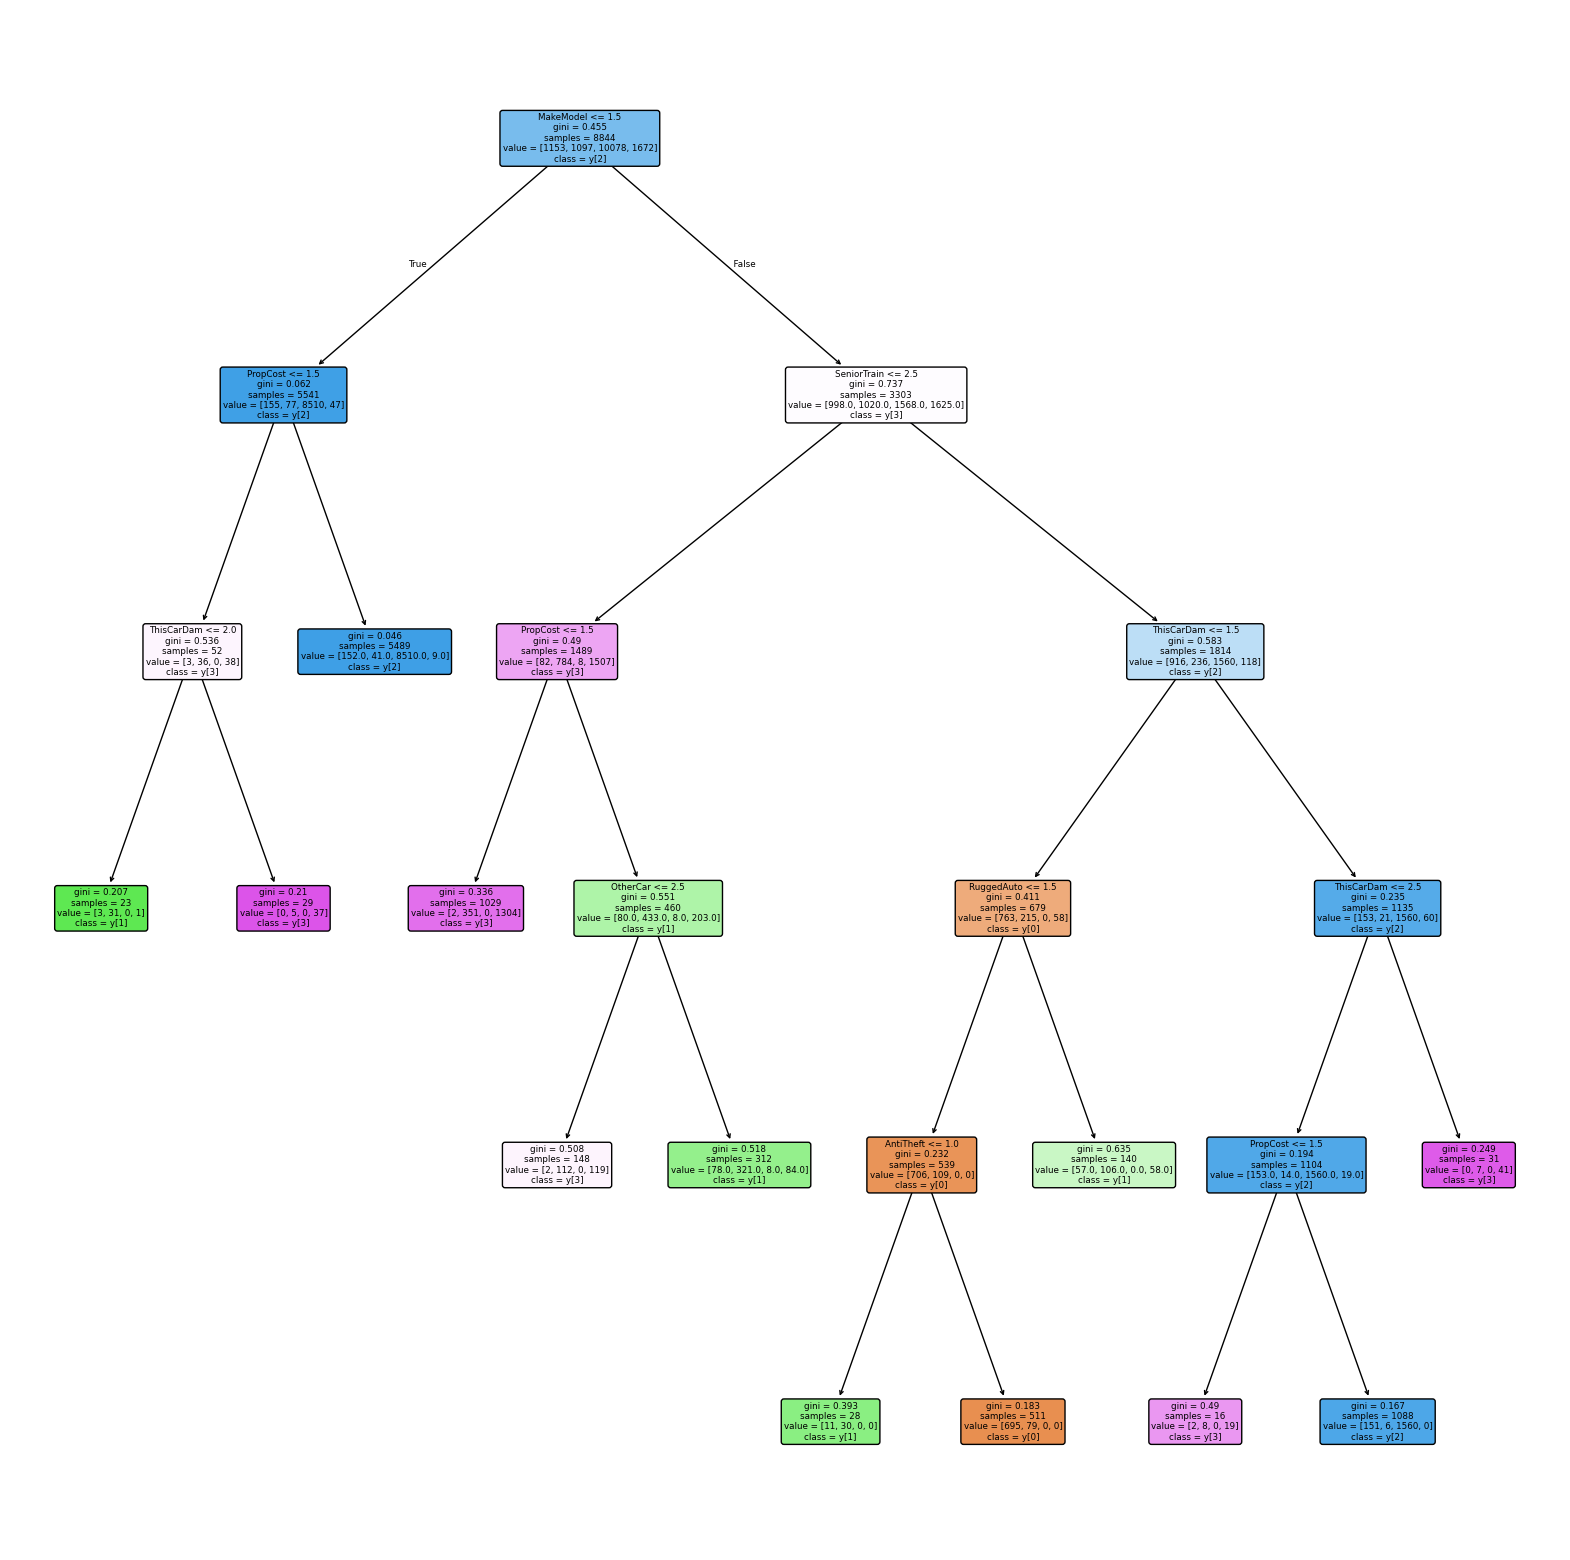

In [11]:
tree_index = 1
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20,20))
plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)
plt.show()

In [12]:
previsoes = modelo.predict(X_teste)

In [13]:
previsoes

array(['Moderate', 'Mild', 'Severe', ..., 'None', 'Mild', 'None'],
      dtype=object)

In [14]:
accuracy = accuracy_score(y_teste,previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acurácia: {accuracy}, Precisão: {precision}, Recall: {recall}, F1: {f1}')

Acurácia: 0.9296666666666666, Precisão: 0.9264995089298133, Recall: 0.9296666666666666, F1: 0.9252184168338298


In [15]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.88      0.61      0.72       570
    Moderate       0.76      0.69      0.72       488
        None       0.96      1.00      0.98      4253
      Severe       0.87      0.93      0.90       689

    accuracy                           0.93      6000
   macro avg       0.87      0.81      0.83      6000
weighted avg       0.93      0.93      0.93      6000

